Cluster label distribution:
 Cluster
 1    78
 0    46
-1    26
Name: count, dtype: int64 



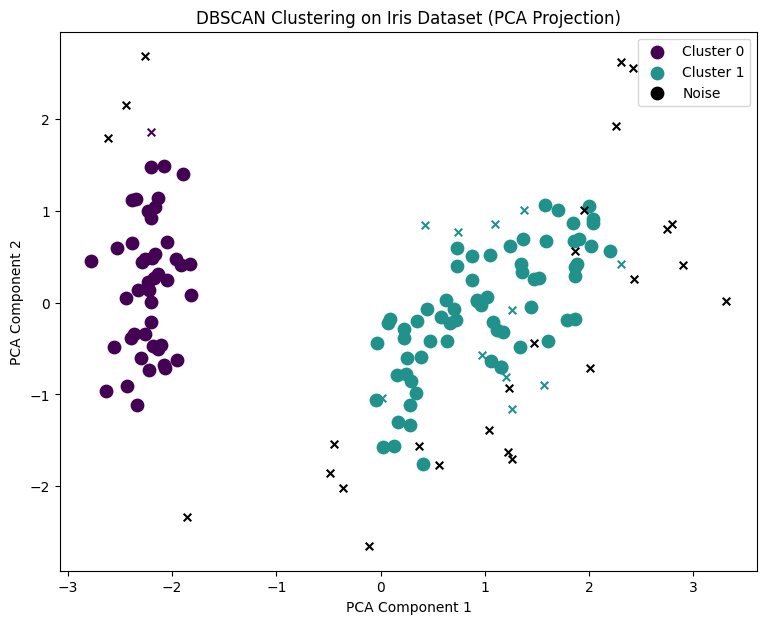

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  
0        0  
1        0  
2        0  
3        0  
4        0  


In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# 1️⃣ Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# 2️⃣ Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3️⃣ Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.6, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# 4️⃣ Add results to DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)
df['Cluster'] = clusters

print("Cluster label distribution:\n", df['Cluster'].value_counts(), "\n")

# 5️⃣ Reduce data to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Identify core samples and noise
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# 6️⃣ Visualization
unique_labels = set(clusters)
colors = [plt.cm.viridis(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(9,7))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black for noise
        col = [0, 0, 0, 1]

    class_member_mask = (clusters == k)

    # Plot core points
    xy = X_pca[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=80, c=[col], marker='o', label=f'Cluster {k}' if k != -1 else 'Noise')

    # Plot border points
    xy = X_pca[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=30, c=[col], marker='x')

plt.title('DBSCAN Clustering on Iris Dataset (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# 7️⃣ Display first few results
print(df.head())
